# Working with Text Data

4 kinds of string data we might see

-Categorical data

-Free strings which may be semantically mapped to categories

-Structured string data

-Text data


In [1]:
import sklearn
import pandas as pd
from sklearn.datasets import load_files
import numpy as np
import mglearn
import matplotlib.pyplot as plt

In [2]:
#We will use a data set of IMDB reviews for this chapter

#scores 7+ are positive, 4- negative.

reviews_train = load_files(r'C:\Users\rudys\Downloads\python-notebooks\MuellerGuido\IMDB\train')

In [3]:
text_train, y_train = reviews_train.data, reviews_train.target
print('type of text_train: {}'.format(type(text_train)))
print('length of text_train: {}'.format(len(text_train)))
print('text_train [6]:\n {}'.format(text_train[6]))

type of text_train: <class 'list'>
length of text_train: 25000
text_train [6]:
 b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [4]:
#Remove the html line breaks from the data

text_train = [doc.replace(b'<br />', b' ') for doc in text_train]

In [5]:
text_train[6]

b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.  Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life.   I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."

In [6]:
print('samples per class (training): {}'.format(np.bincount(y_train)))

samples per class (training): [12500 12500]


In [7]:
reviews_test = load_files(r'C:\Users\rudys\Downloads\python-notebooks\MuellerGuido\IMDB\test')
text_test, y_test = reviews_test.data, reviews_test.target
text_test = [doc.replace(b'<br />', b' ') for doc in text_test]

In [8]:
#now need to convert the string format into a numeric one that the algorithm can understand

#Here comes the bag-of-words representation, first with a toy data set

bards_words = ['the fool doth think he is wise,',
              'but the wise man knows himself to be a fool']

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

In [9]:
len(vect.vocabulary_)

13

In [10]:
format(vect.vocabulary_)

"{'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}"

In [11]:
bag_of_words = vect.transform(bards_words)

In [12]:
#dense representation of the bag of words:

print('dense rep: {}'.format(bag_of_words.toarray()))

dense rep: [[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


In [13]:
#now apply to the reviews.

vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print('X_train: {}'.format(repr(X_train)))

X_train: <25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [14]:
#so we have 74849 words in the vocab
#can see them uing the get_feature_names_out method of the vectorizer

feature_names = vect.get_feature_names_out()
print('first 20 features: {}'.format(feature_names[:20]))

first 20 features: ['00' '000' '0000000000001' '00001' '00015' '000s' '001' '003830' '006'
 '007' '0079' '0080' '0083' '0093638' '00am' '00pm' '00s' '01' '01pm' '02']


In [15]:
print('every 2000th feature: {}'.format(feature_names[::2000]))

every 2000th feature: ['00' 'aesir' 'aquarian' 'barking' 'blustering' 'bête' 'chicanery'
 'condensing' 'cunning' 'detox' 'draper' 'enshrined' 'favorit' 'freezer'
 'goldman' 'hasan' 'huitieme' 'intelligible' 'kantrowitz' 'lawful' 'maars'
 'megalunged' 'mostey' 'norrland' 'padilla' 'pincher' 'promisingly'
 'receptionist' 'rivals' 'schnaas' 'shunning' 'sparse' 'subset'
 'temptations' 'treatises' 'unproven' 'walkman' 'xylophonist']


In [16]:
#here it is asked to check for ourselves whether we can see 007 in the position it is inidcated in the bag of words

df1 = pd.DataFrame.sparse.from_spmatrix(X_train, index=None, columns=feature_names)
new_df=df1.loc[df1['007'] == 1]

new_df

,00,000,0000000000001,00001,00015,000s,001,003830,006,007,...,était,état,étc,évery,êxtase,ís,ísnt,østbye,über,üvegtigris
554,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6583,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7758,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9637,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10764,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15068,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16627,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
17873,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
22458,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
23321,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
print('007 example: {}'.format(text_train[554]))

007 example: b'"Dutch Schultz", AKA Arthur Fleggenheimer, was a real person and his rather nasty life is fairly well documented. This movie which purports to depict his life should have used a fictional character, because the overdramatized events are too strong a departure from the facts and the chronology. Not only that, it ignores some interesting details which other versions have included such as the public relations fiasco in upstate N.Y. and his religious conversion. It is true that he was executed by Luciano, Lansky, et. al. but that\'s as far as it goes. The exploding plate scene which represents Luciano carrying out the execution of Bo Weinberg in his own home, assisted by his own mother is rediculous. Also, there is the scene in which Dutch approaches his own mother to pay protection to Legs Diamond. It just doesn\'t work. The character of Mrs. Fleggenheimer doesn\'t work either. This movie does not need a doting Jewish mother for comic relief. The lame representation of Legs

In [18]:
#lets build a classifier to obtain a quantitative measure of performance
#First evaluate a logistic regressor with cv

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(max_iter=1000), X_train, y_train, cv=5)
print('mean CV acc: {:.2f}'.format(np.mean(scores)))

mean CV acc: 0.88


In [19]:
#88% is a reasonable accuracy for this simple logistic regression
#GridSearch to optimize hyperparams

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001,0.01,0.1,1,10]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)

C:\Users\rudys\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [20]:
print('best params:', grid.best_params_)
print('best score:', grid.best_score_)

best params: {'C': 0.1}
best score: 0.8881599999999998


In [21]:
#try it on the test set now

X_test = vect.transform(text_test)
print('test score: {:.2f}'.format(grid.score(X_test,y_test)))

test score: 0.88


In [22]:
#next see if we can improve the extraction of words.

#set the minimum number of docs a token must appear in.

vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print('X_train with min df: {}'.format(repr(X_train)))

X_train with min df: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [23]:
feature_names = vect.get_feature_names_out()

In [24]:
#train our new grid on the reduced X_train

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)

C:\Users\rudys\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rudys\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [25]:
print('best params: {}'.format(grid.best_params_))
print('best score: {:.2f}'.format(grid.best_score_))

best params: {'C': 0.1}
best score: 0.89


In [26]:
#accuracy is slightly better. We can also discard words that are too frequent
#sklearn has built in lists of stopwords

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

print('number of stopwords: {}'.format(len(ENGLISH_STOP_WORDS)))
print('every tenth stopword: {}'.format(list(ENGLISH_STOP_WORDS)[::10]))

number of stopwords: 318
every tenth stopword: ['top', 'might', 'within', 'hence', 'themselves', 'often', 'please', 'this', 'fifteen', 'its', 'have', 'everyone', 'sometime', 'whereafter', 'thin', 'whereupon', 'into', 'hereafter', 'she', 'them', 'detail', 'has', 'as', 'thereby', 'already', 'back', 'anyhow', 'five', 'over', 'these', 'there', 'across']


In [27]:
vect = CountVectorizer(min_df=5, stop_words='english').fit(text_train)

In [28]:
X_train = vect.transform(text_train)

In [29]:
print('X_Train with stopwords: \n{}'.format(repr(X_train)))

X_Train with stopwords: 
<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [30]:
#final gridsearch check to see the impact on accuracy:

grid = GridSearchCV(LogisticRegression(max_iter=1000, n_jobs=-1), param_grid, cv=5)

In [31]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, n_jobs=-1),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [32]:
print('best CV score {:.2f}'.format(grid.best_score_))

best CV score 0.88


In [33]:
#another approacg to dropping features is to rescale them according to importance.
#ter-frequency inverse document frequency is a method giving high weight to a term that appears frequently in
#a particular document, but not in other documents in the corpus.

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
                     LogisticRegression(max_iter=1000, n_jobs=-1))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.89


In [34]:
#can see the highest and lowest tfidf features

vectorizer = grid.best_estimator_.named_steps['tfidfvectorizer']

X_train = vectorizer.transform(text_train)

max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

feature_names = np.array(vectorizer.get_feature_names_out())

In [35]:
print('features with highest tfidf: \n{}'.format(feature_names[sorted_by_tfidf[:20]]))
print('features with lowest tfidf: \n{}'.format(feature_names[sorted_by_tfidf[-20:]]))

features with highest tfidf: 
['poignant' 'disagree' 'instantly' 'importantly' 'lacked' 'occurred'
 'currently' 'altogether' 'nearby' 'undoubtedly' 'directs' 'fond'
 'stinker' 'avoided' 'emphasis' 'commented' 'disappoint' 'realizing'
 'downhill' 'inane']
features with lowest tfidf: 
['coop' 'homer' 'dillinger' 'hackenstein' 'gadget' 'taker' 'macarthur'
 'vargas' 'jesse' 'basket' 'dominick' 'the' 'victor' 'bridget' 'victoria'
 'khouri' 'zizek' 'rob' 'timon' 'titanic']


In [36]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print('features with lowest idf: \n{}'.format(feature_names[sorted_by_idf[:100]]))

features with lowest idf: 
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


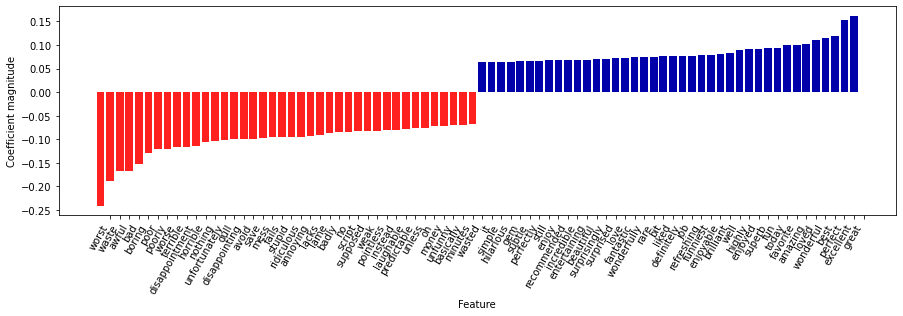

In [37]:
#investigate a bit what our model is actually picking up from the data
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps['logisticregression'].coef_,
    feature_names, n_top_features=40)

In [38]:
#word order is completely discarded in the bag of words. by creating n-grams or multiple word tokens, the order is preserved
#depending on how we set our ngram_range

bards_words

['the fool doth think he is wise,',
 'but the wise man knows himself to be a fool']

In [39]:
cv = CountVectorizer(ngram_range=(1,1)).fit(bards_words)
print('vocab size: {}'.format(len(cv.vocabulary_)))
print('vocab \n{}'.format(cv.get_feature_names_out()))

vocab size: 13
vocab 
['be' 'but' 'doth' 'fool' 'he' 'himself' 'is' 'knows' 'man' 'the' 'think'
 'to' 'wise']


In [40]:
cv = CountVectorizer(ngram_range=(2,2)).fit(bards_words)
print('vocab size: {}'.format(len(cv.vocabulary_)))
print('vocab \n{}'.format(cv.get_feature_names_out()))

vocab size: 14
vocab 
['be fool' 'but the' 'doth think' 'fool doth' 'he is' 'himself to'
 'is wise' 'knows himself' 'man knows' 'the fool' 'the wise' 'think he'
 'to be' 'wise man']


In [41]:
#selecting to high of an ngram_range may lead to overfitting.

cv = CountVectorizer(ngram_range=(1,3)).fit(bards_words)
print('vocab size: {}'.format(len(cv.vocabulary_)))
print('vocab \n{}'.format(cv.get_feature_names_out()))

vocab size: 39
vocab 
['be' 'be fool' 'but' 'but the' 'but the wise' 'doth' 'doth think'
 'doth think he' 'fool' 'fool doth' 'fool doth think' 'he' 'he is'
 'he is wise' 'himself' 'himself to' 'himself to be' 'is' 'is wise'
 'knows' 'knows himself' 'knows himself to' 'man' 'man knows'
 'man knows himself' 'the' 'the fool' 'the fool doth' 'the wise'
 'the wise man' 'think' 'think he' 'think he is' 'to' 'to be' 'to be fool'
 'wise' 'wise man' 'wise man knows']


In [42]:
#we can find the best ngram range using gridsearch

pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=1000, n_jobs=-1))

param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],
             'tfidfvectorizer__ngram_range': [(1,1), (1,2), (1,3)]}

In [43]:
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)

print('Best CV score: {:.2f}'.format(grid.best_score_))
print('best_params: \n{}'.format(grid.best_params_))

Best CV score: 0.91
best_params: 
{'logisticregression__C': 10, 'tfidfvectorizer__ngram_range': (1, 3)}


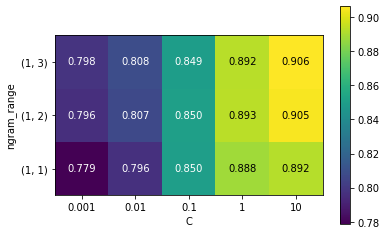

In [44]:
#so bigrams and trigrams are improving our model.
#visualize the scores as a heatmap

scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T

heatmap = mglearn.tools.heatmap(
    scores, xlabel='C', ylabel='ngram_range', cmap='viridis', fmt='%.3f',
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])

plt.colorbar(heatmap)

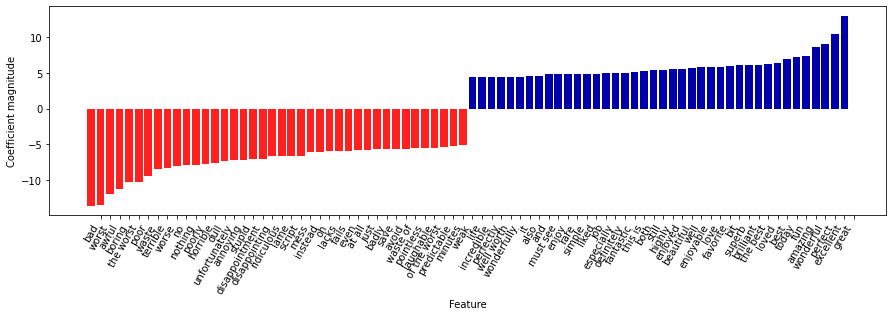

In [45]:
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names_out())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_

mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)

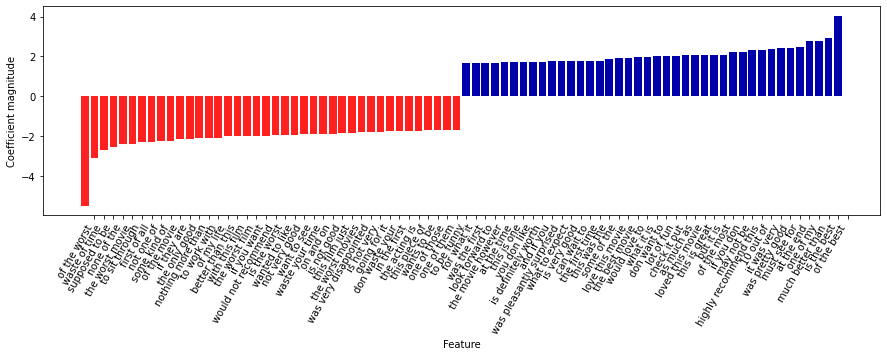

In [46]:
#find now the best/worst 3-gram features

mask = np.array([len(feature.split(' ')) for feature in feature_names]) == 3

mglearn.tools.visualize_coefficients(coef.ravel()[mask],
                                    feature_names[mask], n_top_features=40)

In [47]:
#Much more elaborate methods of tokenization are possible
#stemming can decrease the chance of overfitting by taking the stem of a word.
#stemming is done using a rule based heuristic. If a dictionary is used, it's called lemmatization
#these are both types of normalization.

import nltk
import spacy

In [49]:
en_nlp = spacy.load('en_core_web_sm')

In [50]:
stemmer = nltk.stem.PorterStemmer()

In [51]:
#function to compare lemmatization in spacy with stemming in nltk

def compare_normalization(doc):
    doc_spacy = en_nlp(doc)
    print('lemmatization:')
    print([token.lemma_ for token in doc_spacy])
    print('stemming:')
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

In [52]:
compare_normalization(u'Alex entered the house a the clip clop of his hooves could be heard rattling through the hallways')

lemmatization:
['Alex', 'enter', 'the', 'house', 'a', 'the', 'clip', 'clop', 'of', 'his', 'hoof', 'could', 'be', 'hear', 'rattle', 'through', 'the', 'hallway']
stemming:
['alex', 'enter', 'the', 'hous', 'a', 'the', 'clip', 'clop', 'of', 'hi', 'hoov', 'could', 'be', 'heard', 'rattl', 'through', 'the', 'hallway']


In [56]:
# Technicallity: we want to use the regexp based tokenizer
# that is used by CountVectorizer  and only use the lemmatization
# from SpaCy. To this end, we replace en_nlp.tokenizer (the SpaCy tokenizer)
# with the regexp based tokenization
import re
# regexp used in CountVectorizer:
regexp = re.compile('(?u)\\b\\w\\w+\\b')
# load spacy language model
en_nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
old_tokenizer = en_nlp.tokenizer
# replace the tokenizer with the preceding regexp
en_nlp.tokenizer = lambda string: old_tokenizer.tokens_from_list(
    regexp.findall(string))

# create a custom tokenizer using the SpaCy document processing pipeline
# (now using our own tokenizer)
def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

# define a count vectorizer with the custom tokenizer
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)

In [57]:
# transform text_train using CountVectorizer with lemmatization
X_train_lemma = lemma_vect.fit_transform(text_train)
print("X_train_lemma.shape: {}".format(X_train_lemma.shape))

# standard CountVectorizer for reference
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train.shape: {}".format(X_train.shape))

AttributeError: 'spacy.tokenizer.Tokenizer' object has no attribute 'tokens_from_list'

In [59]:
# build a grid-search using only 1% of the data as training set:
from sklearn.model_selection import StratifiedShuffleSplit

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.99,
                            train_size=0.01, random_state=0)
grid = GridSearchCV(LogisticRegression(), param_grid, cv=cv)
# perform grid search with standard CountVectorizer
grid.fit(X_train, y_train)
print("Best cross-validation score "
      "(standard CountVectorizer): {:.3f}".format(grid.best_score_))
# perform grid search with Lemmatization
grid.fit(X_train_lemma, y_train)
print("Best cross-validation score "
      "(lemmatization): {:.3f}".format(grid.best_score_))

Best cross-validation score (standard CountVectorizer): 0.760


C:\Users\rudys\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NameError: name 'X_train_lemma' is not defined

In [60]:
#topic modelling involves the assignment of documents into topics, usually without supervision.
#LDA tries to find groups of words that appear together frequently

vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

In [62]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method='batch',
                               max_iter=25, random_state=0)

document_topics = lda.fit_transform(X)

In [63]:
print('lda.components_.shape: {}'.format(lda.components_.shape))

lda.components_.shape: (10, 10000)


In [64]:
#can check the most important words for each of these topics

sorting = np.argsort(lda.components_, axis=1)[:, ::-1]

In [65]:
feature_names = np.array(vect.get_feature_names_out())

In [67]:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                          sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
young         world         worst         series        saw           
family        us            comedy        episode       am            
real          our           thing         tv            thought       
performance   american      guy           episodes      years         
beautiful     documentary   re            shows         book          
work          history       stupid        season        watched       
each          new           actually      new           now           
both          own           nothing       television    dvd           
director      point         want          years         got           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
horr

In [68]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method='batch',
                                  max_iter=25, random_state=0)

document_topics100 = lda100.fit_transform(X)

In [70]:
topics = np.array([7, 16, 24, 28, 36, 37, 45, 51, 53, 54, 63, 89, 97])

sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
                          sorting=sorting, topics_per_chunk=5, n_words=20)

topic 7       topic 16      topic 24      topic 28      topic 36      
--------      --------      --------      --------      --------      
thriller      worst         german        beautiful     performance   
suspense      awful         hitler        young         role          
horror        boring        nazi          old           actor         
atmosphere    horrible      midnight      romantic      cast          
mystery       stupid        joe           between       play          
house         thing         germany       romance       actors        
director      terrible      years         wonderful     performances  
quite         script        history       heart         played        
bit           nothing       new           feel          supporting    
de            worse         modesty       year          director      
performances  waste         cowboy        each          oscar         
dark          pretty        jewish        french        roles         
twist 

In [72]:
#Can check the contents of one of these topics. for example from topic 24

war = np.argsort(document_topics100[:, 24])[::-1]

for i in war[:10]:
    print(b'.'.join(text_train[i].split(b'.')[:2]) + b'.\n')

b'"Hitler, the rise of Evil" is clearly produced by people emotionally unburdened by the horrors of World War 2. Which makes watching a refreshing experience.\n'
b'This is a good movie, although people unfamiliar with the Modesty Blaise comics and books may find it a little slow and lacking in action. For the Modesty fan, the movie will be very enjoyable, particularly because it is very faithful in its presentation of the Modesty Blaise "history".\n'
b"Imagine that you could have anything you wanted, go anywhere you wished, be anything you'd ever dreamed of being - through thought alone. Now imagine yourself sharing this gift with the love of your life.\n"
b'Those childhood memories..\n'
b"'Midnight Cowboy' was rated X with the original release back in 1969. There are some scenes where you can understand that, just a little.\n"
b'Since most review\'s of this film are of screening\'s seen decade\'s ago I\'d like to add a more recent one, the film open\'s with stock footage of B-17\'s bo